# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [2]:
FEATURES_PATH = "data/my_20_sec_features-router-2022_07_11__16_55_02.npy"
LABELS_PATH = "data/my_20_sec_labels-router-2022_07_11__16_55_02.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [4]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['www.amazon.co.uk', '71'],
       ['www.bbc.co.uk', '59'],
       ['www.ebay.co.uk', '57'],
       ['www.facebook.com', '72'],
       ['www.google.co.uk', '62'],
       ['www.google.com', '56'],
       ['www.twitter.com', '51'],
       ['www.uwe.ac.uk', '55'],
       ['www.wikipedia.com', '60'],
       ['www.youtube.com', '63']], dtype='<U21')

([<matplotlib.patches.Wedge at 0x135dee790>,
 [Text(-0.4317833437114736, 1.1196263412823673, 'www.amazon.co.uk'),
  Text(-1.0361060420879955, 0.6053794426215257, 'www.bbc.co.uk'),
  Text(-1.1968408424493442, -0.08701722728945242, 'www.ebay.co.uk'),
  Text(-0.8850829404835246, -0.8103259766692894, 'www.facebook.com'),
  Text(-0.1612560122744055, -1.18911584738635, 'www.google.co.uk'),
  Text(0.5508769628635709, -1.0660837545831978, 'www.google.com'),
  Text(1.0297737239047997, -0.6160893421860516, 'www.twitter.com'),
  Text(1.1999354996245075, 0.012441733837522829, 'www.uwe.ac.uk'),
  Text(0.9859467707057653, 0.684038716254331, 'www.wikipedia.com'),
  Text(0.38499091956406617, 1.136565876600743, 'www.youtube.com')],
 [Text(-0.25187361716502626, 0.6531153657480474, '11.7%'),
  Text(-0.6043951912179973, 0.35313800819589, '9.7%'),
  Text(-0.6981571580954506, -0.05076004925218057, '9.4%'),
  Text(-0.5162983819487227, -0.47269015305708545, '11.9%'),
  Text(-0.09406600716006987, -0.6936509109

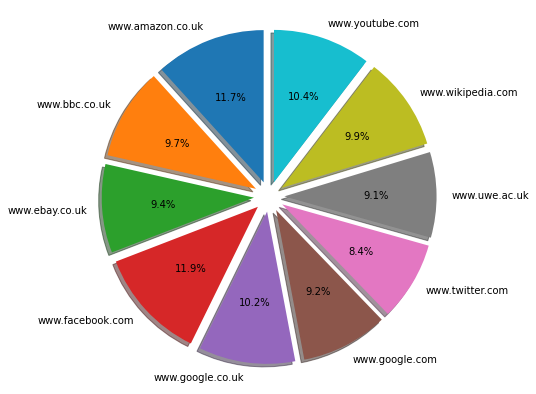

In [5]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [6]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 634.0


(array([133., 127.,  22.,  31.,  68.,  41.,  25.,  16.,  13.,  20.,  19.,
         10.,   8.,   6.,  31.,  13.,  11.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   1.,   1.]),
 array([  9. ,  21.5,  34. ,  46.5,  59. ,  71.5,  84. ,  96.5, 109. ,
        121.5, 134. , 146.5, 159. , 171.5, 184. , 196.5, 209. , 221.5,
        234. , 246.5, 259. , 271.5, 284. , 296.5, 309. , 321.5, 334. ,
        346.5, 359. , 371.5, 384. , 396.5, 409. , 421.5, 434. , 446.5,
        459. , 471.5, 484. , 496.5, 509. , 521.5, 534. , 546.5, 559. ,
        571.5, 584. , 596.5, 609. , 621.5, 634. ]),
 <BarContainer object of 50 artists>)

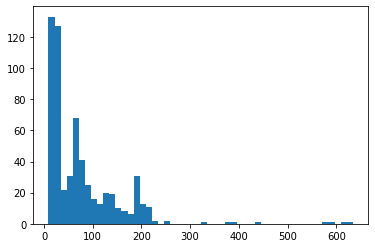

In [7]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [8]:
unique_labels = np.unique(labels)

In [9]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

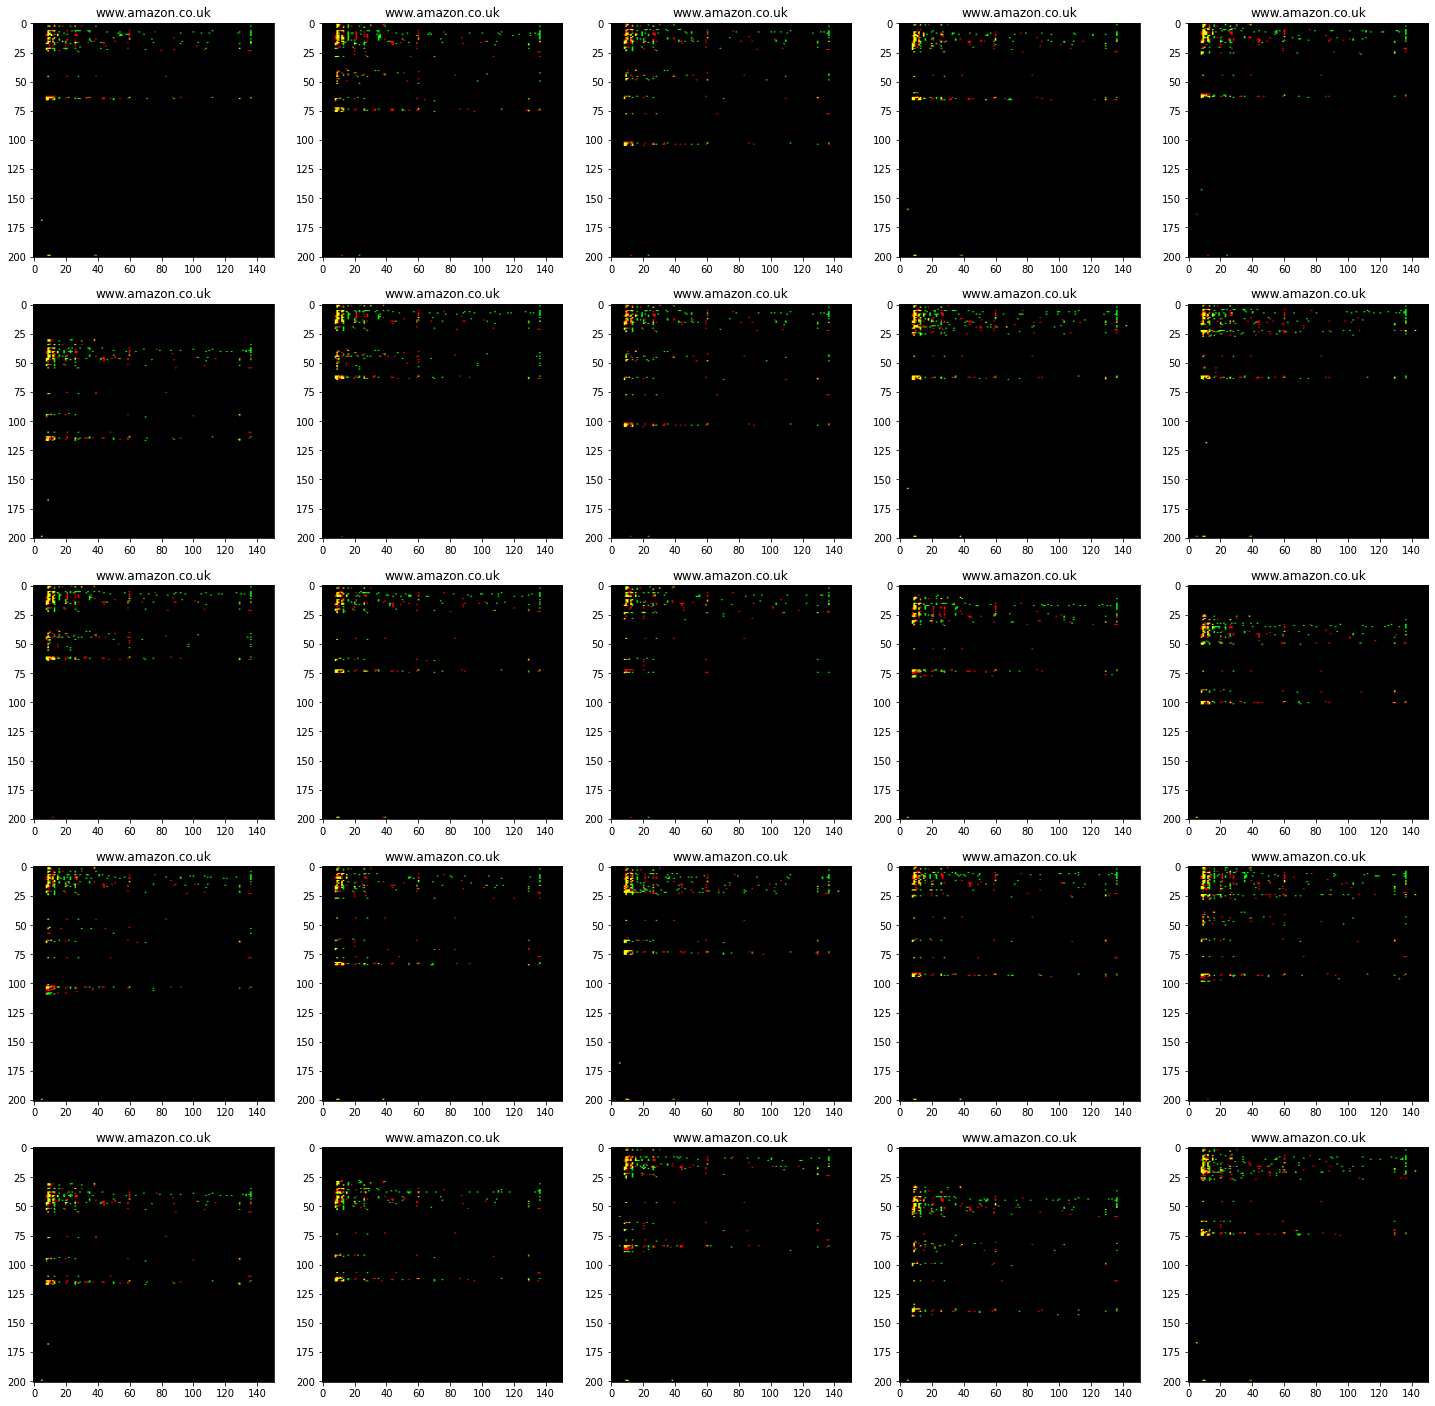

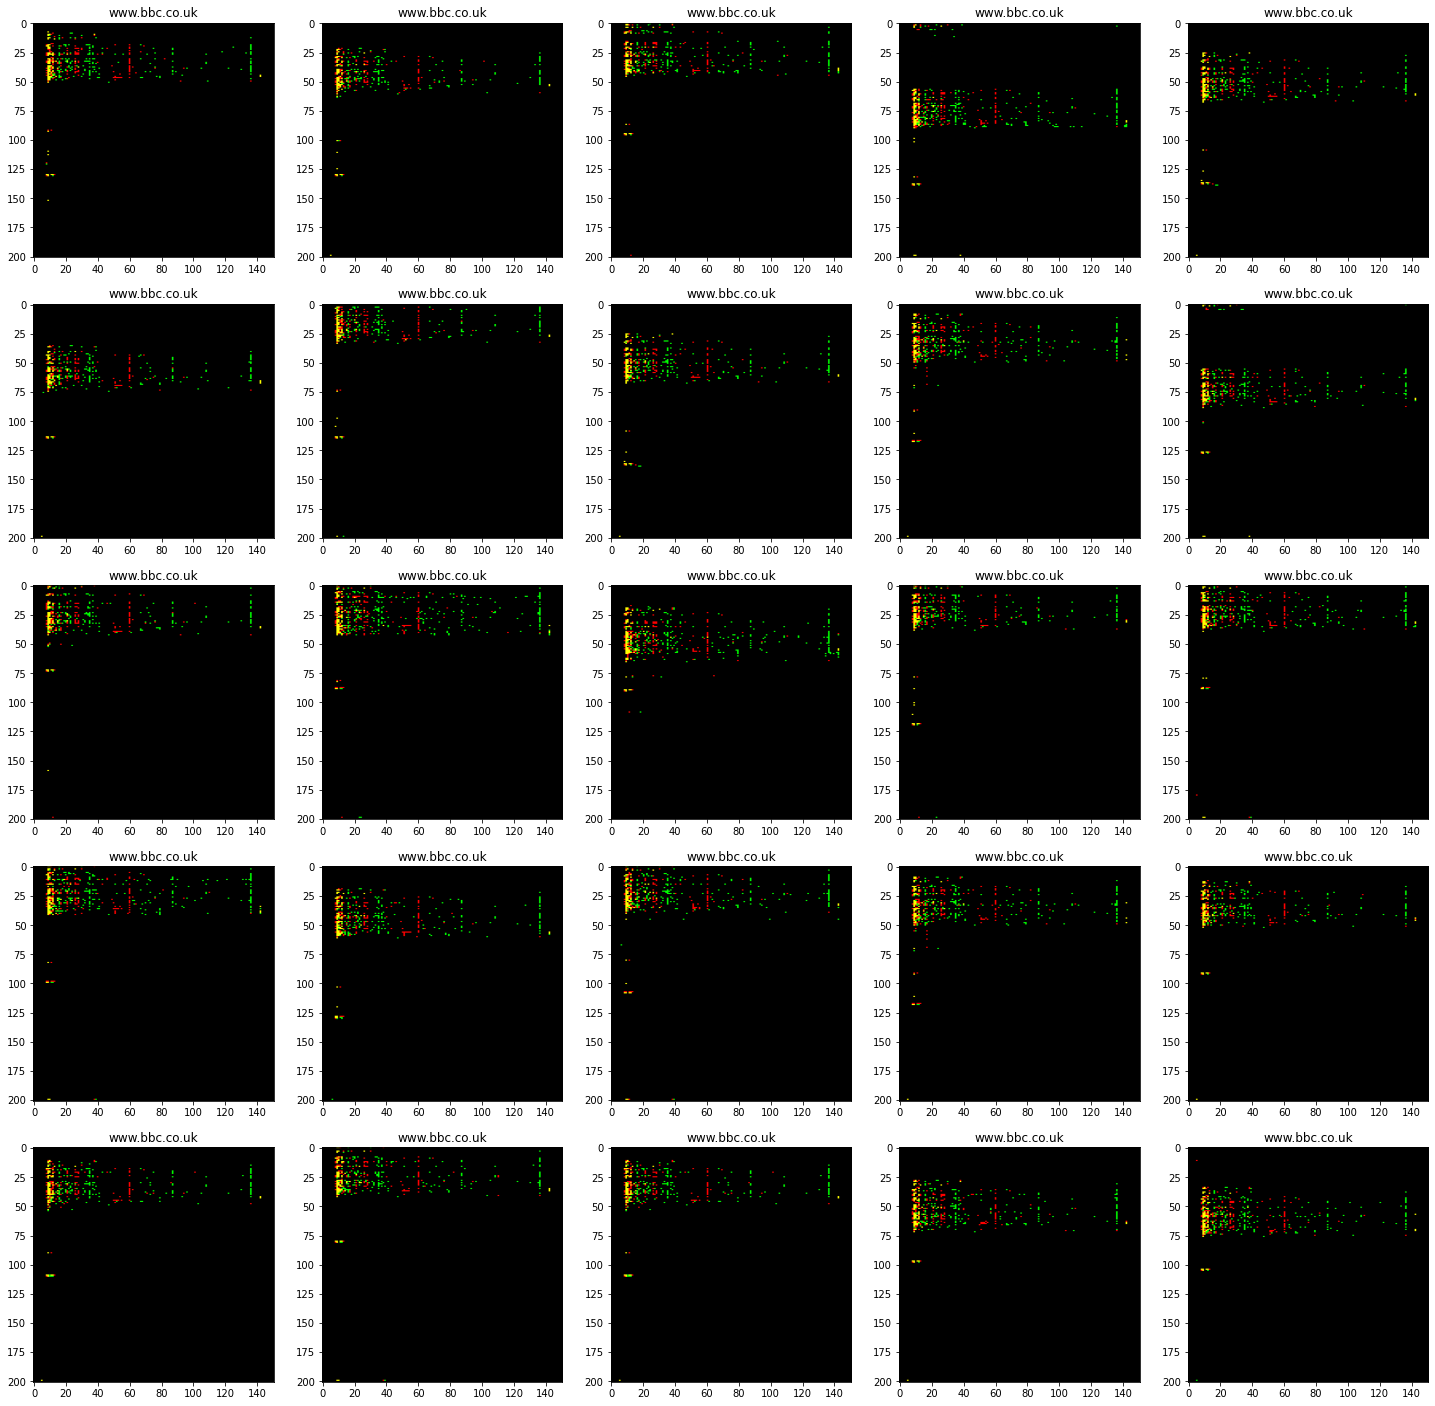

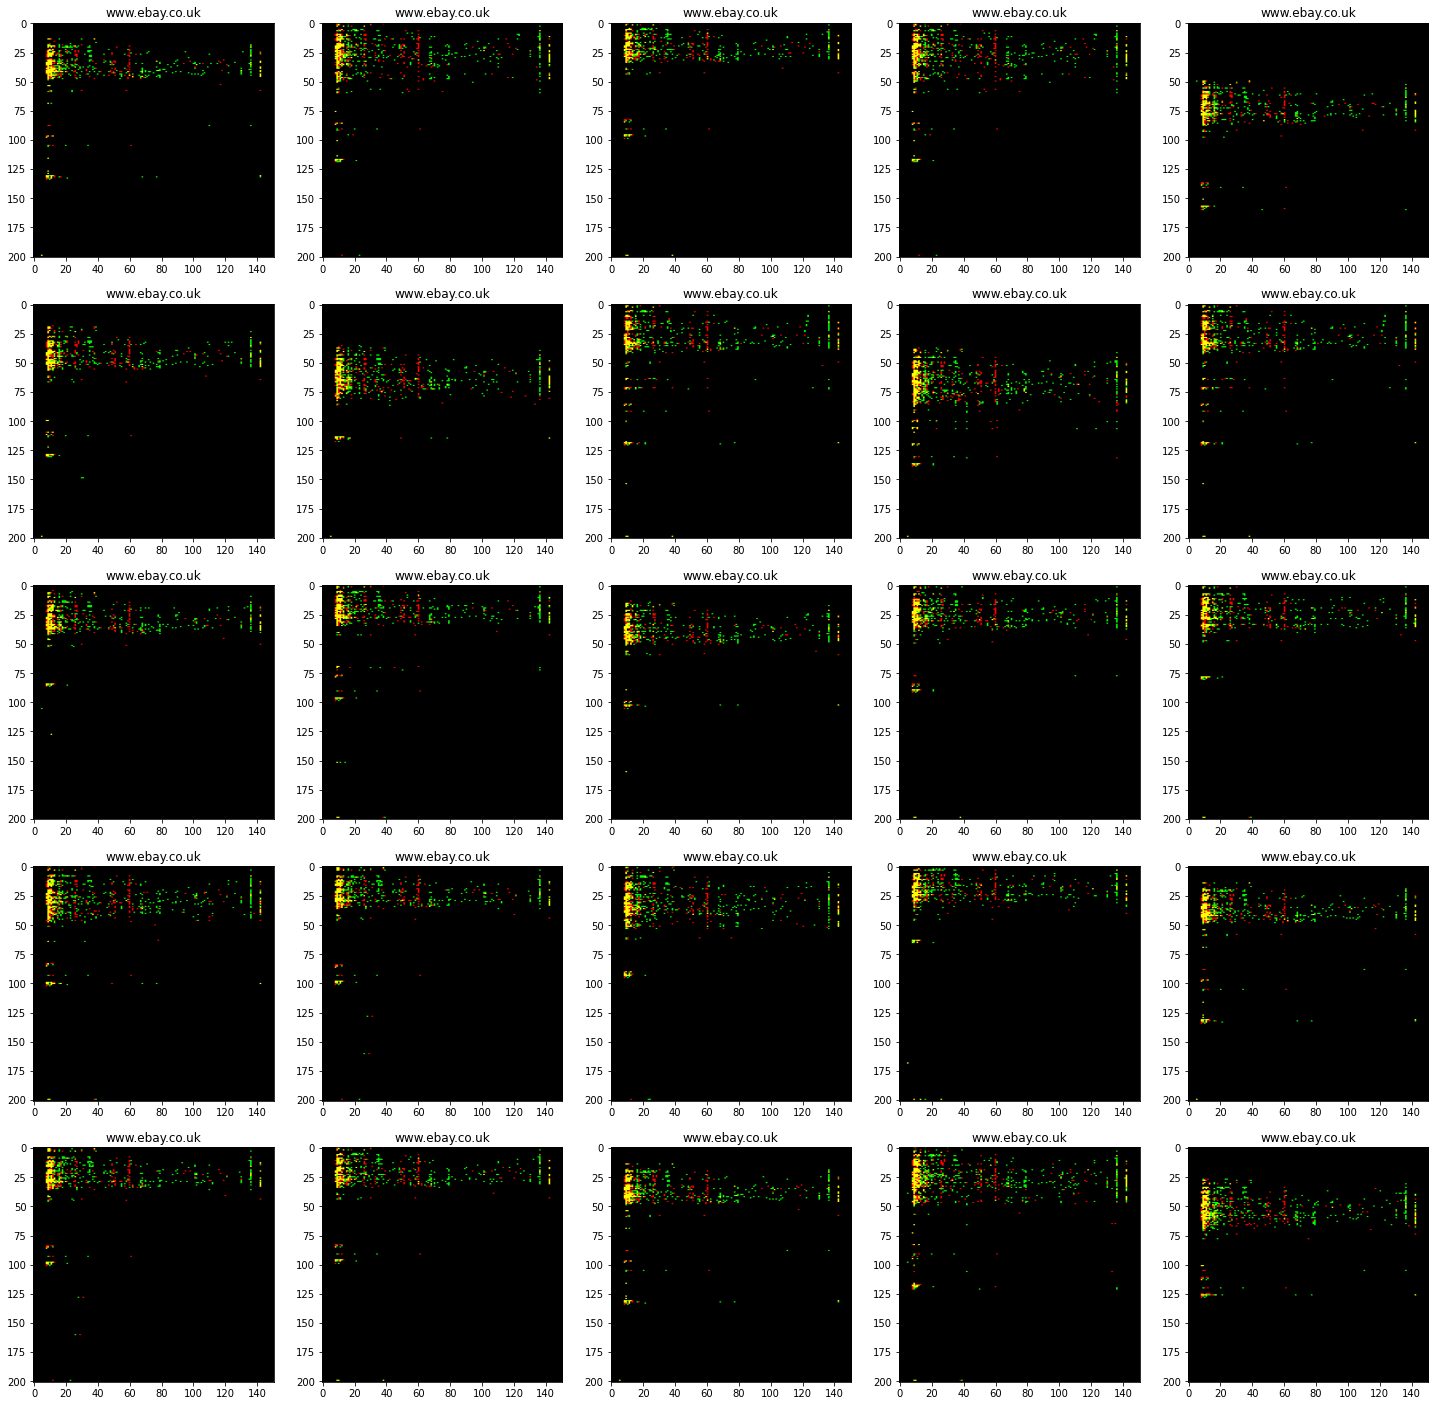

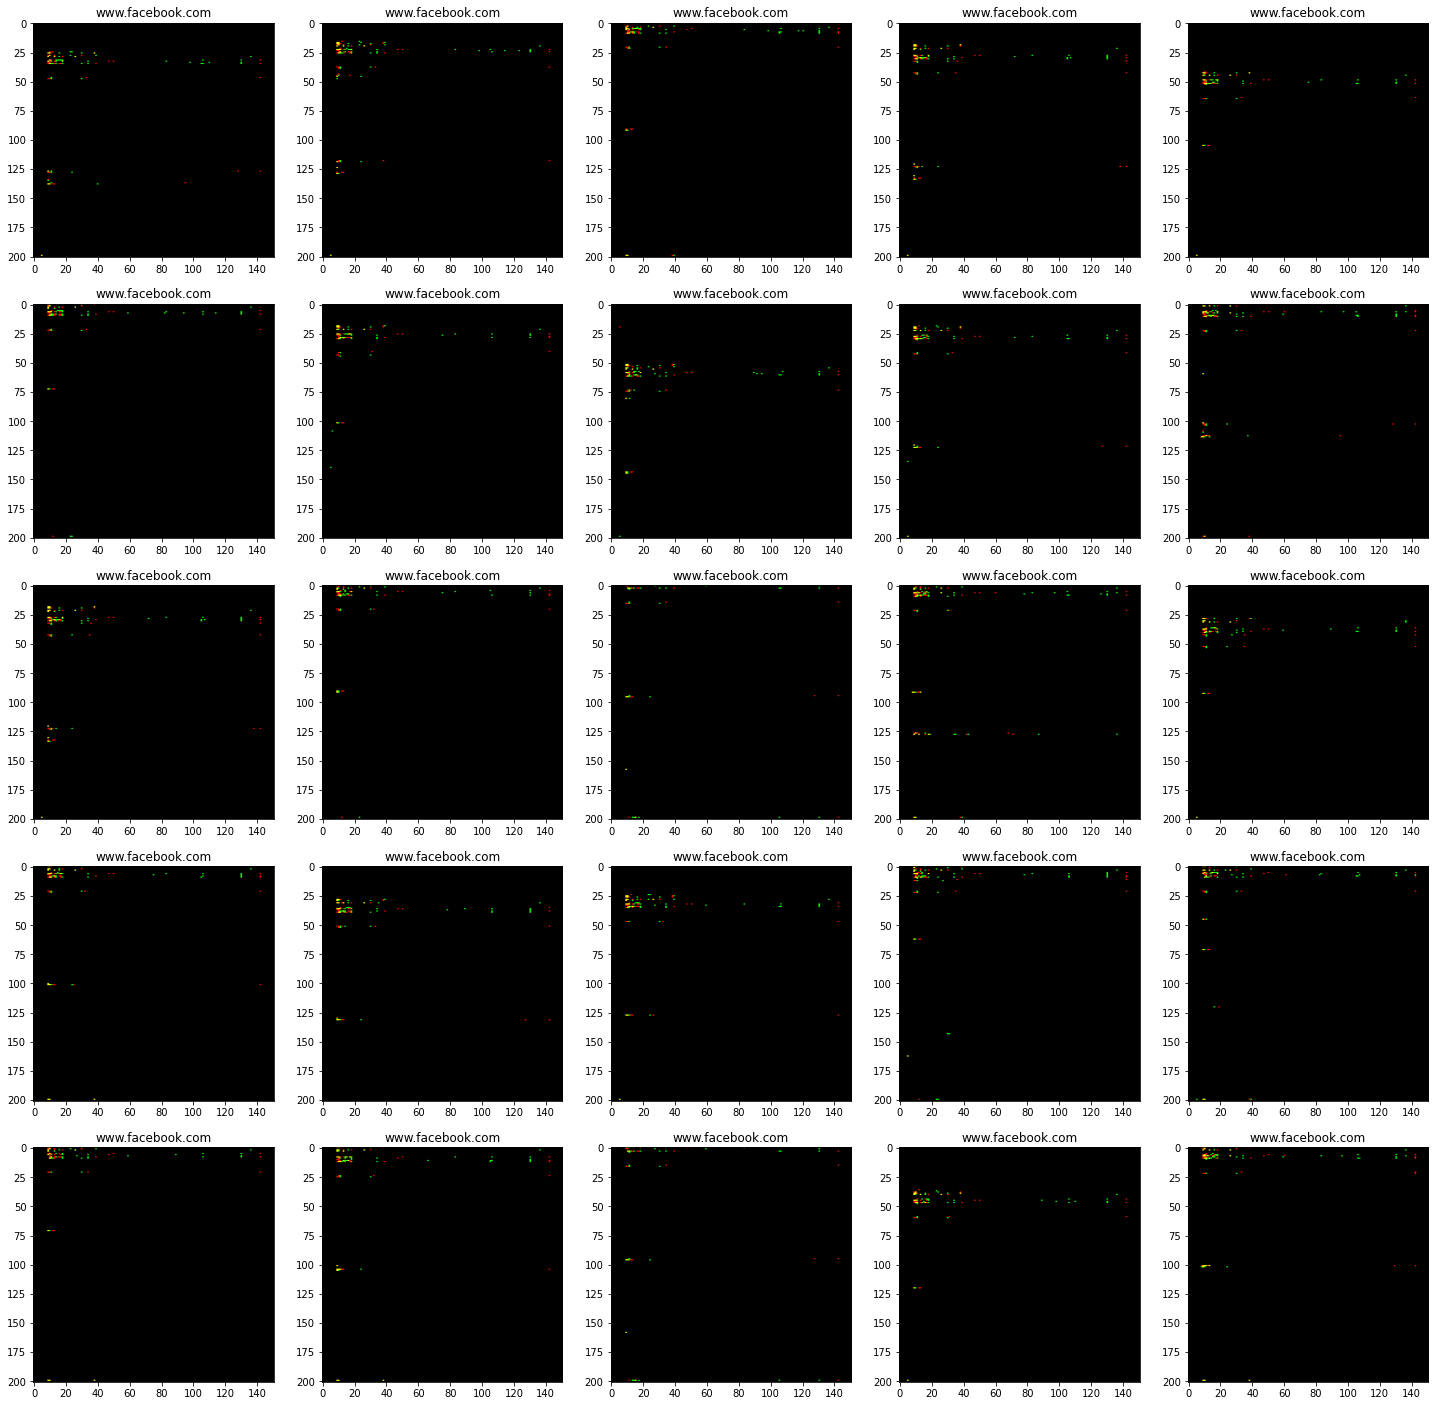

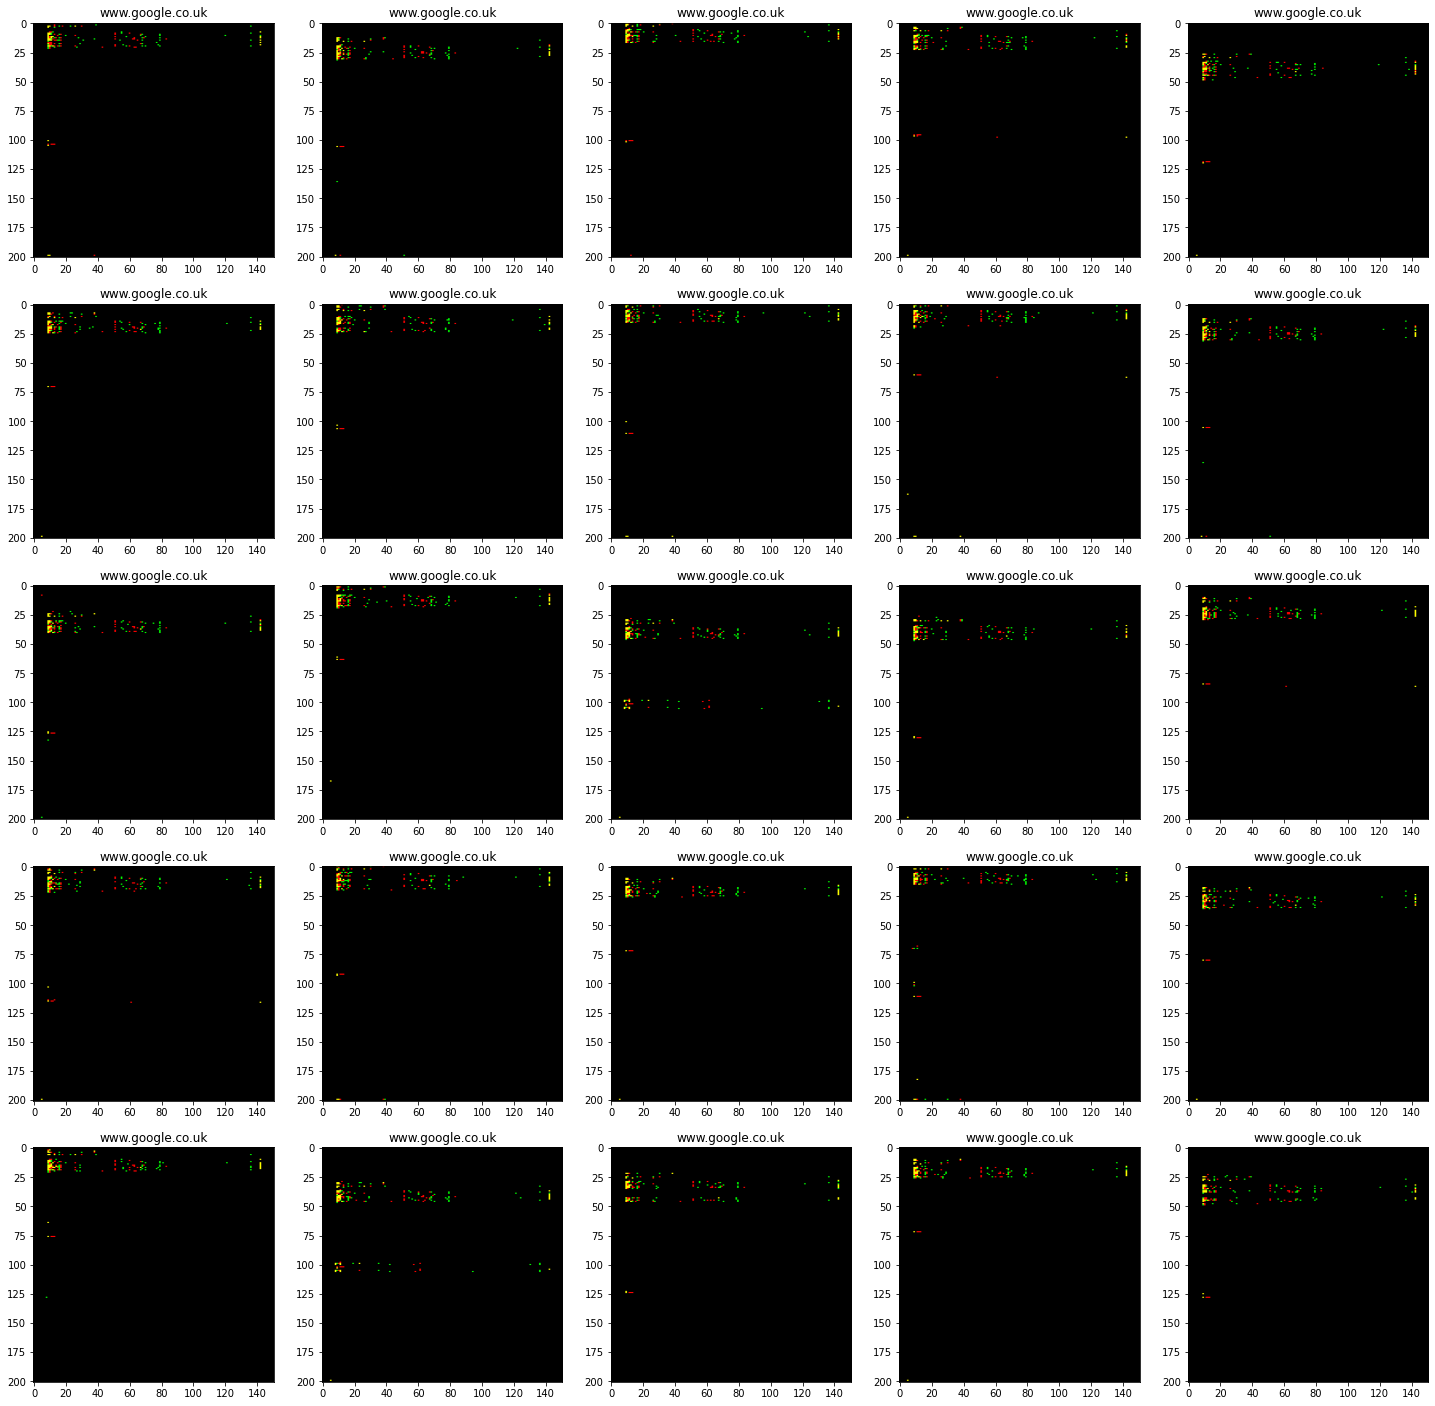

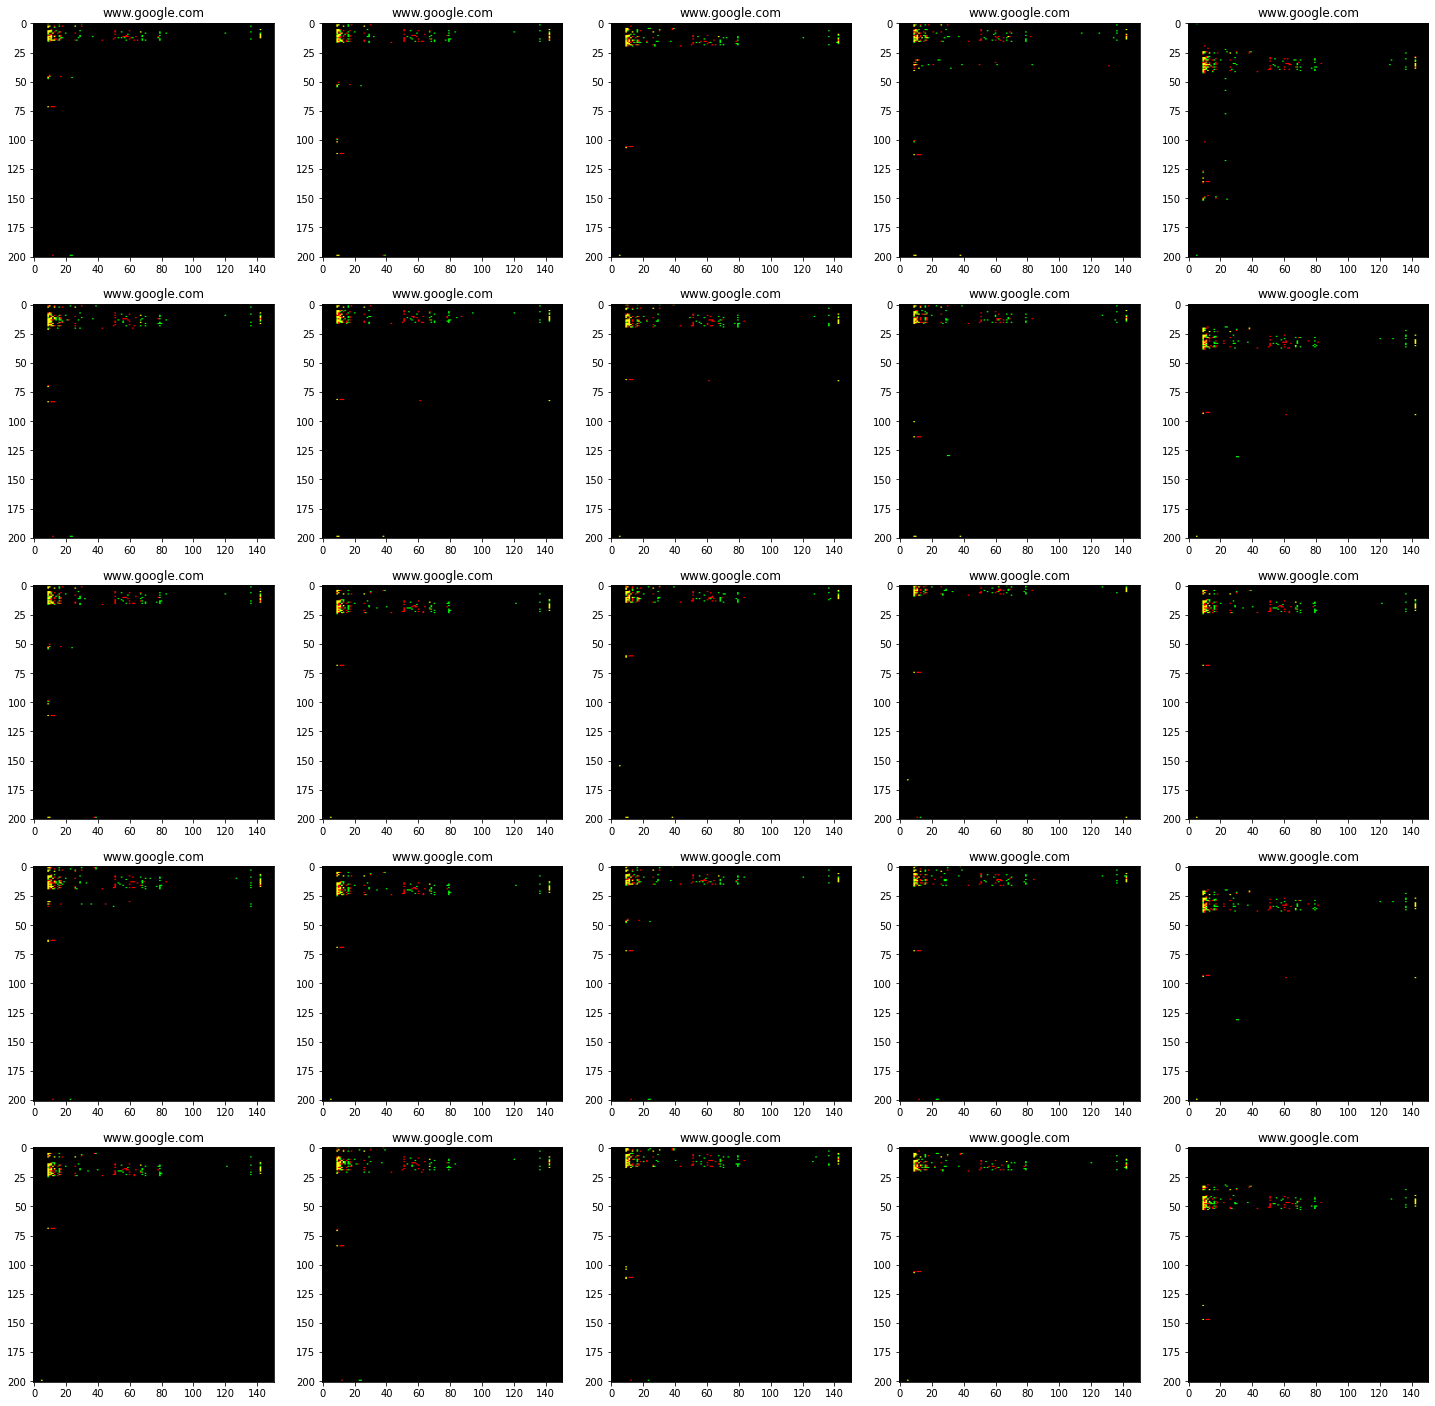

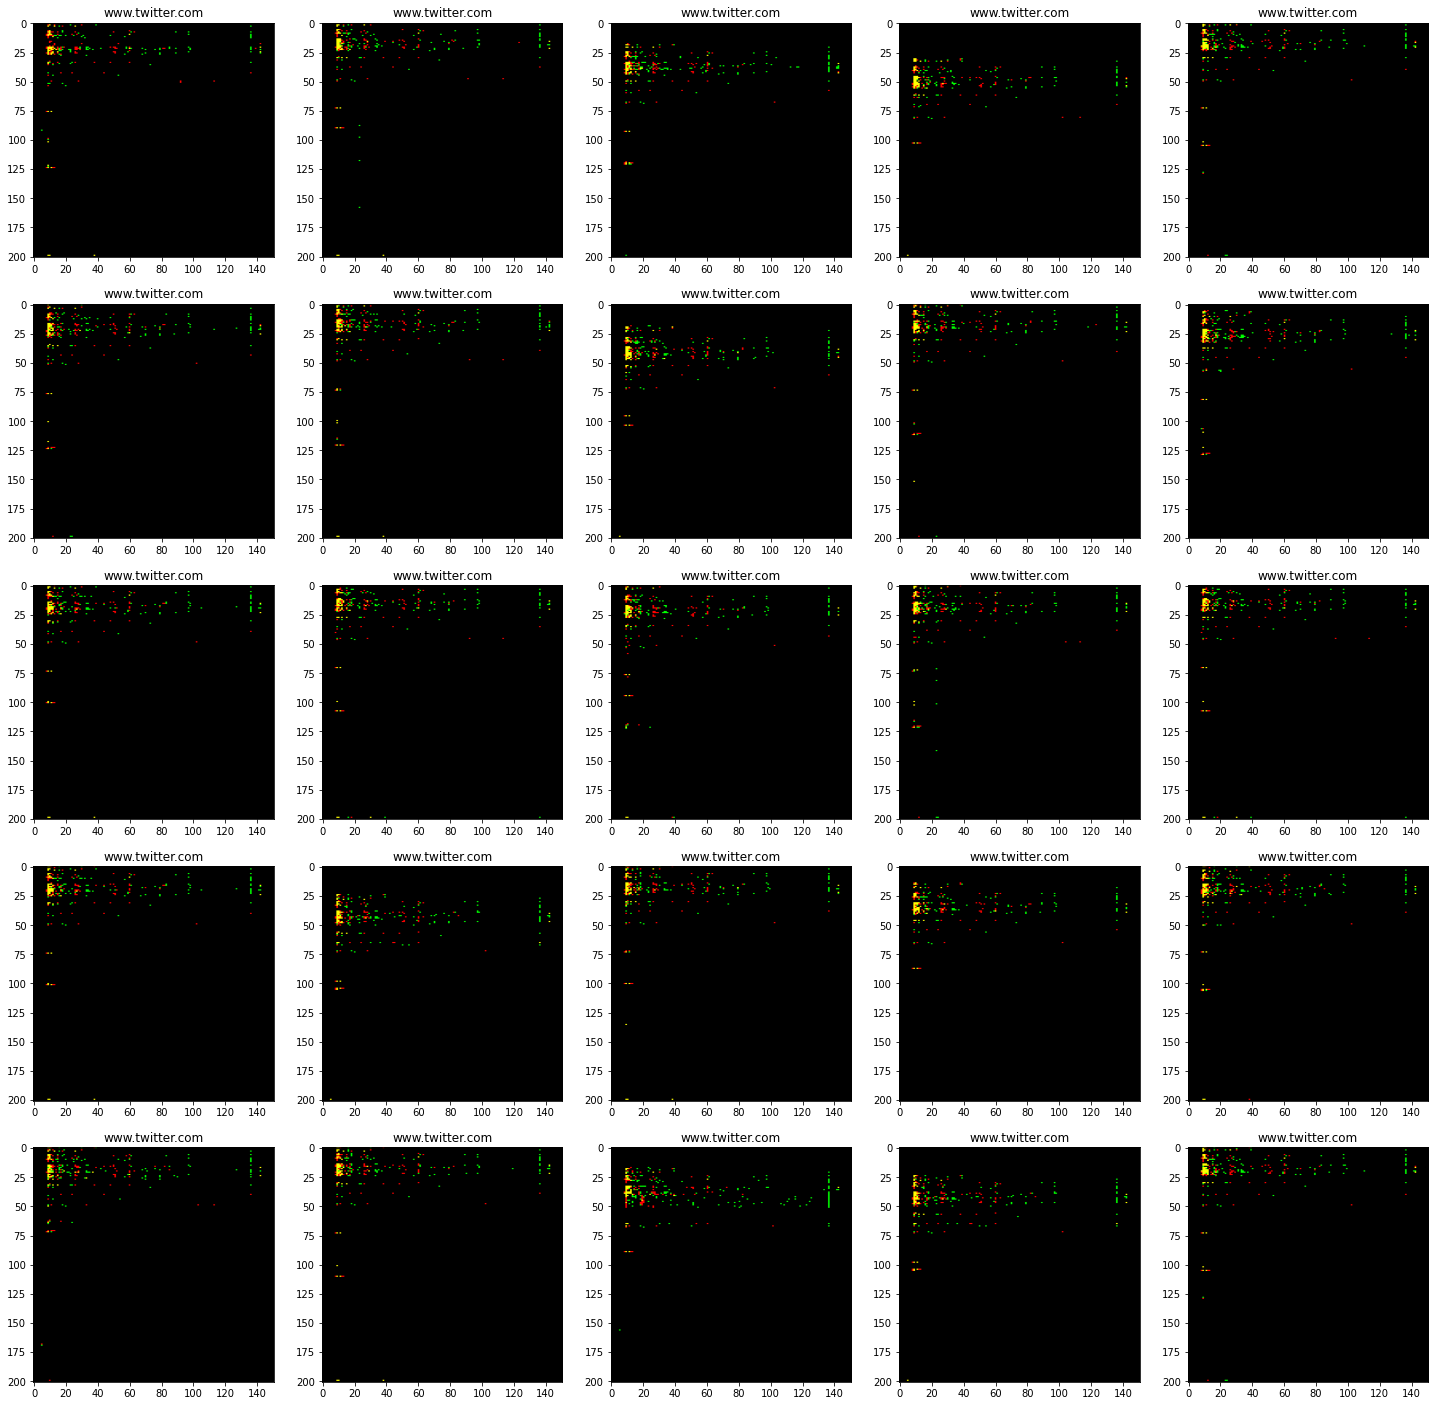

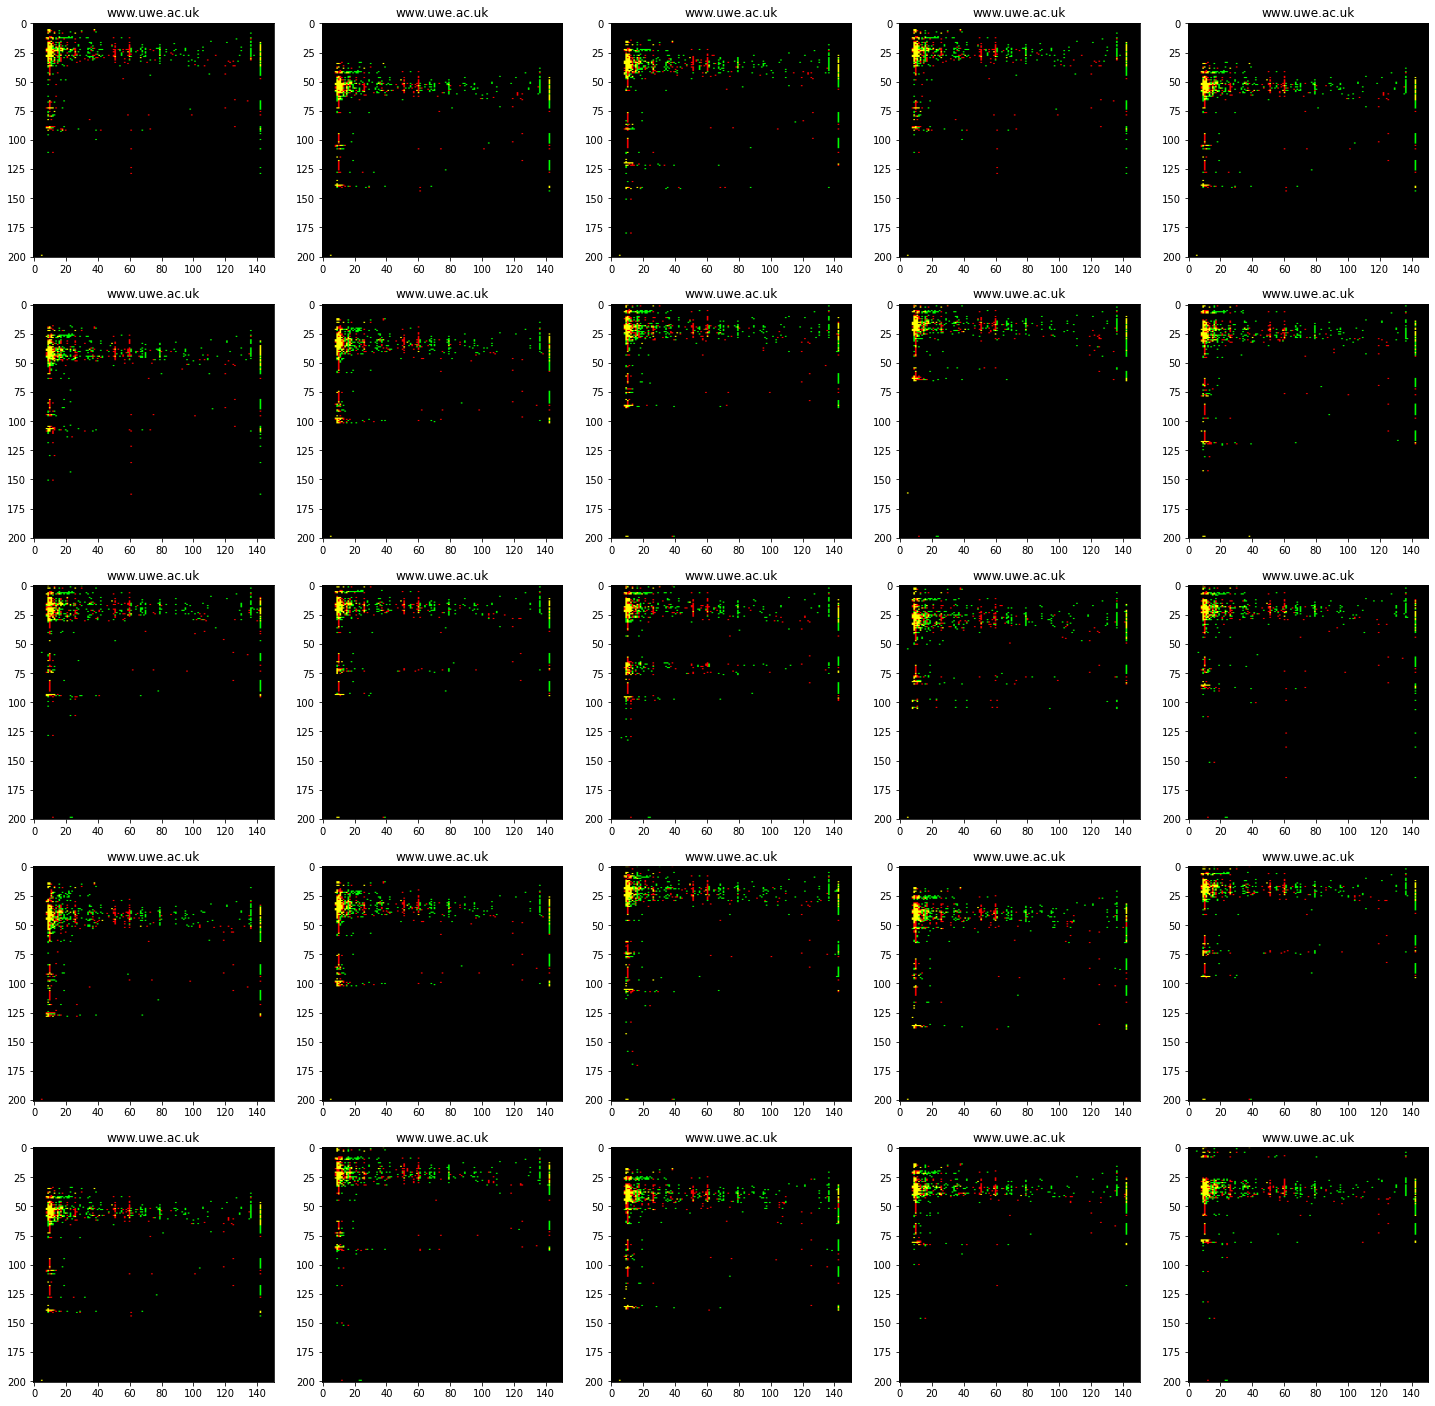

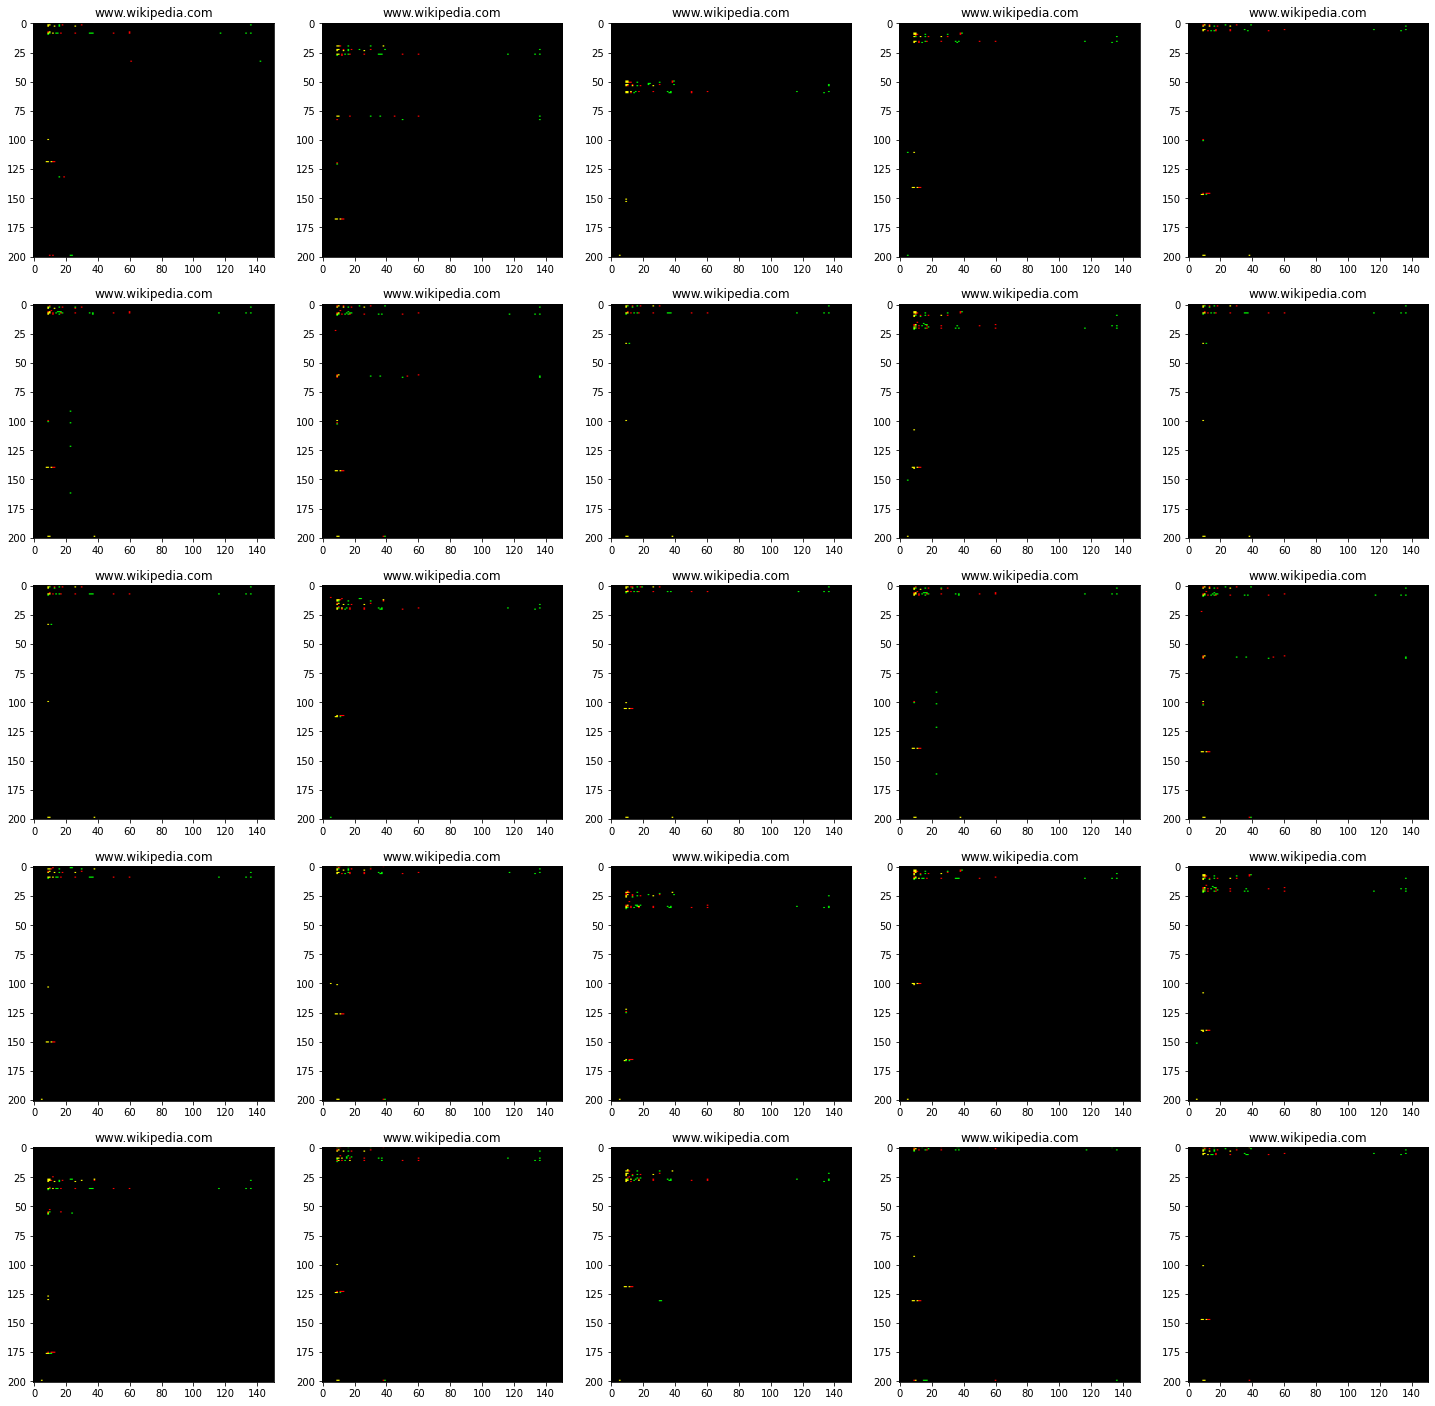

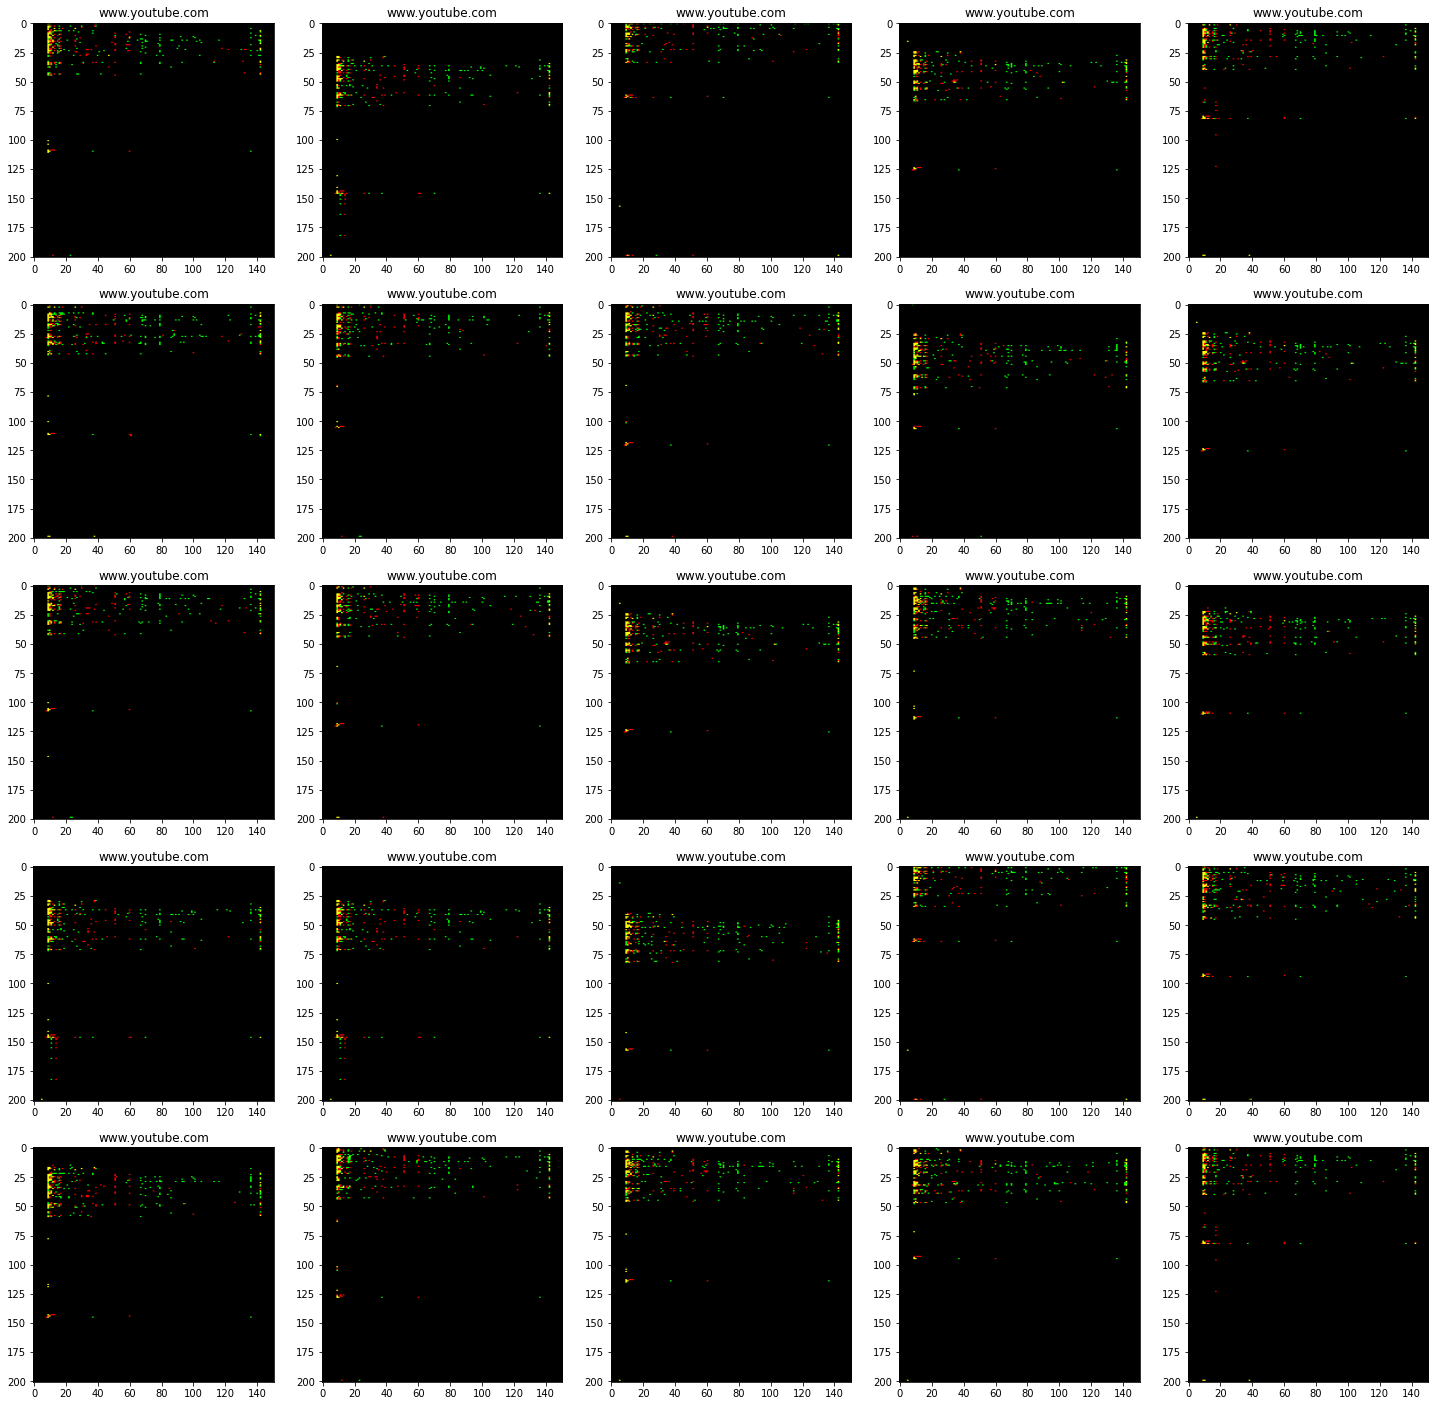

In [10]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")